# Flow over a Circular cylinder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Calibration data

In [2]:
calib_data = pd.read_csv('Aerodynamics_Experiment_II_Data/S1_Cal_data.txt',delim_whitespace='\t')
calib_data

,U(m/s),E(V)
0,0.000,2.110
1,0.563,2.258
2,1.054,2.361
3,1.533,2.438
4,2.083,2.508
5,2.553,2.558
6,3.053,2.605
7,3.502,2.643
8,4.029,2.684


In [3]:
A = pow(calib_data['E(V)'][0],2)

In [4]:
Ln_U = np.log(calib_data['U(m/s)'][1:])
Ln_E2_E02 = np.log(pow(calib_data['E(V)'][1:],2)-A)

In [5]:
n,C = np.polyfit(Ln_U,Ln_E2_E02,deg=1)
fit = n*Ln_U + C

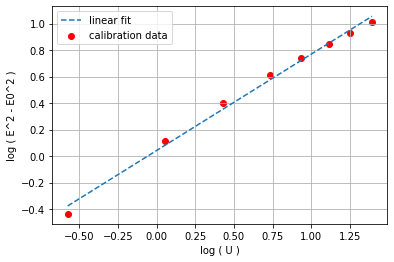

In [6]:
plt.grid();
plt.scatter(x=Ln_U,y=Ln_E2_E02,c='r')
plt.plot(Ln_U,fit,'--');
plt.xlabel('log ( U )');plt.ylabel('log ( E^2 - E0^2 )');
plt.legend(['linear fit','calibration data']);

In [7]:
B = np.exp(C)

In [8]:
calib_coeff_df = pd.DataFrame({
    'coeff': ['A','B','n'],
    'Value':[A,B,n],
})
calib_coeff_df

,coeff,Value
0,A,4.452100
1,B,1.042330
2,n,0.727256


## Wake data

In [9]:
# cylinder diameter
d = 6     # mm

In [10]:
wake_df1 = pd.read_csv('Aerodynamics_Experiment_II_Data/wake u x y.txt',delim_whitespace='\t')
wake_df1

,U(m/s),X(mm),Y(mm)
0,4.0274,38,29
1,4.0034,38,25
2,3.9760,38,21
3,4.0307,38,17
4,3.9971,38,15
5,4.0028,38,13
6,3.9849,38,11
7,4.0020,38,9
8,3.9820,38,7
9,3.9760,38,6


> ## voltage data

In [11]:
wake_df2 = pd.read_csv('Aerodynamics_Experiment_II_Data/wake volts.txt',delim_whitespace='\t',header=None)
wake_df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
0,2.6691,2.6691,2.6692,2.6697,2.6697,2.6700,2.6708,2.6710,2.6713,2.6718,...,2.6747,2.6745,2.6745,2.6750,2.6744,2.6747,2.6742,2.6742,2.6742,2.6742
1,2.6819,2.6815,2.6807,2.6797,2.6791,2.6779,2.6773,2.6762,2.6754,2.6752,...,2.6784,2.6778,2.6774,2.6770,2.6770,2.6768,2.6770,2.6768,2.6771,2.6781
2,2.6902,2.6905,2.6905,2.6902,2.6908,2.6908,2.6905,2.6902,2.6900,2.6890,...,2.6778,2.6791,2.6797,2.6803,2.6811,2.6819,2.6816,2.6815,2.6810,2.6810
3,2.6778,2.6800,2.6831,2.6852,2.6868,2.6887,2.6905,2.6916,2.6932,2.6945,...,2.7003,2.7006,2.7003,2.6998,2.6998,2.6995,2.6990,2.6974,2.6942,2.6908
4,2.6910,2.6914,2.6911,2.6910,2.6903,2.6900,2.6902,2.6893,2.6889,2.6876,...,2.7098,2.7098,2.7098,2.7096,2.7085,2.7069,2.7046,2.7027,2.7003,2.6980


> ## Voltage to Velocity Conversion

In [12]:
wake_u_df = pow(((pow(wake_df2,2)-A)/B),(1/n))
wake_u_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
0,3.648839,3.648839,3.649841,3.654855,3.654855,3.657865,3.665895,3.667904,3.670918,3.675944,...,3.705148,3.703131,3.703131,3.708174,3.702122,3.705148,3.700106,3.700106,3.700106,3.700106
1,3.778064,3.773998,3.765871,3.755722,3.749638,3.737483,3.731411,3.720291,3.712211,3.710193,...,3.742546,3.736471,3.732423,3.728377,3.728377,3.726355,3.728377,3.726355,3.729388,3.739508
2,3.862844,3.865923,3.865923,3.862844,3.869003,3.869003,3.865923,3.862844,3.860792,3.850539,...,3.736471,3.749638,3.755722,3.761810,3.769934,3.778064,3.775014,3.773998,3.768918,3.768918
3,3.736471,3.758766,3.790274,3.811679,3.828021,3.847465,3.865923,3.877221,3.893679,3.907071,...,3.967056,3.970169,3.967056,3.961870,3.961870,3.958760,3.953578,3.937016,3.903979,3.869003
4,3.871057,3.875166,3.872084,3.871057,3.863871,3.860792,3.862844,3.853614,3.849514,3.836203,...,4.066123,4.066123,4.066123,4.064027,4.052507,4.035774,4.011771,3.991988,3.967056,3.943224


> ## U_mean and U_rms Velocities

In [13]:
u_mean = np.empty(wake_u_df.shape[0])
u_rms = np.empty(wake_u_df.shape[0])
for i in range(wake_u_df.shape[0]):
    u_mean[i] = np.mean(np.array(wake_u_df[i:i+1]))
    u_rms[i] = np.std(np.array(wake_u_df[i:i+1]))

In [14]:
u_mean_By_U = np.transpose(u_mean/wake_df1['U(m/s)'])
u_rms_BY_U = np.transpose(u_rms/wake_df1['U(m/s)'])
y_BY_d = wake_df1['Y(mm)']/d

In [15]:
wake_df1['Y/d'] = y_BY_d
wake_df1['u_mean/U'] = u_mean_By_U
wake_df1['u_rms/U'] = u_rms_BY_U

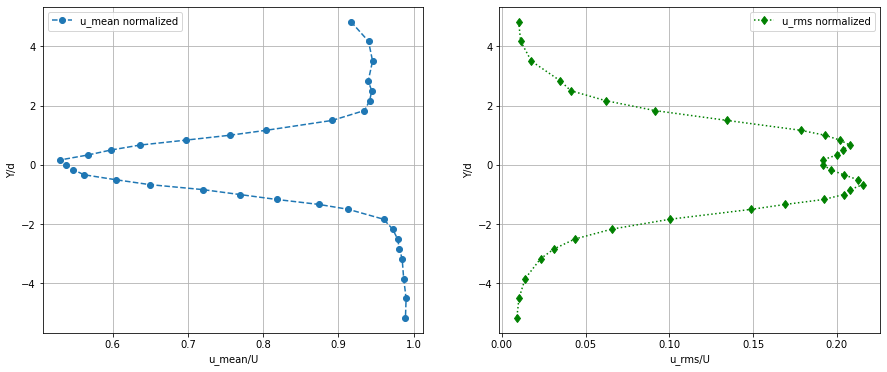

In [16]:
plt.figure(figsize=(15,6));
plt.subplot(1,2,1);
plt.plot(wake_df1['u_mean/U'],wake_df1['Y/d'],'--o');plt.xlabel('u_mean/U');plt.ylabel('Y/d');plt.grid();plt.legend(['u_mean normalized']);
plt.subplot(1,2,2);
plt.plot(wake_df1['u_rms/U'],wake_df1['Y/d'],':dg');plt.xlabel('u_rms/U');plt.ylabel('Y/d');plt.grid();plt.legend(['u_rms normalized']);

## Vortex Data

In [17]:
# cylinder diameter mm
dv = 1.6

> # vortex data information
> ## vortex_df[0] = velocity (U)
> ## vortex_df[1: ] = voltage (V)

> ## $U_1 = 1.333\space m/s$

In [18]:
vortex_df1 = pd.read_csv('Aerodynamics_Experiment_II_Data/S1_vortex_shedding_1p3mps.txt',delim_whitespace='\t',header=None)
vortex_df1

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,1.333,2.369,2.37,2.371,2.372,2.374,2.376,2.378,2.38,2.382,...,2.377,2.379,2.381,2.383,2.385,2.388,2.39,2.393,2.395,2.397


> ## $U_2 = 1.728 \space m/s$

In [19]:
vortex_df2 = pd.read_csv('Aerodynamics_Experiment_II_Data/S1_vortex_shedding_1p7mps.txt',delim_whitespace='\t',header=None)
vortex_df2

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,1.728,2.477,2.475,2.472,2.468,2.464,2.459,2.454,2.448,2.443,...,2.422,2.419,2.417,2.416,2.415,2.415,2.415,2.416,2.418,2.421


> ## $U_3 = 2.931 \space m/s$

In [20]:
vortex_df3 = pd.read_csv('Aerodynamics_Experiment_II_Data/S1_vortex_shedding_2p9mps.txt',delim_whitespace='\t',header=None)
vortex_df3

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,2.931,2.581,2.571,2.562,2.554,2.547,2.54,2.536,2.535,2.535,...,2.575,2.583,2.589,2.592,2.593,2.591,2.587,2.581,2.575,2.568


In [21]:
cf1 = np.asarray(vortex_df1)
cf2 = np.asarray(vortex_df2)
cf3 = np.asarray(vortex_df3)
# vortex_U_df1 = pow(((pow(cf1[0][1:],2)-A)/B),(1/n))
# vortex_U_df2 = pow(((pow(cf2[0][1:],2)-A)/B),(1/n))
# vortex_U_df3 = pow(((pow(cf3[0][1:],2)-A)/B),(1/n))

In [22]:
def FFT(df):
    n = 10000
    ufft = np.fft.fft(df)
    amplitude = 2.0*np.abs(ufft[0:int(n/2)])/n
    amplitude[0] = 0.0
    return amplitude
freq = np.linspace(0.0,10000,5000)

In [23]:
ampU1 = FFT(cf1[0][1:])
ampU2 = FFT(cf2[0][1:])
ampU3 = FFT(cf3[0][1:])

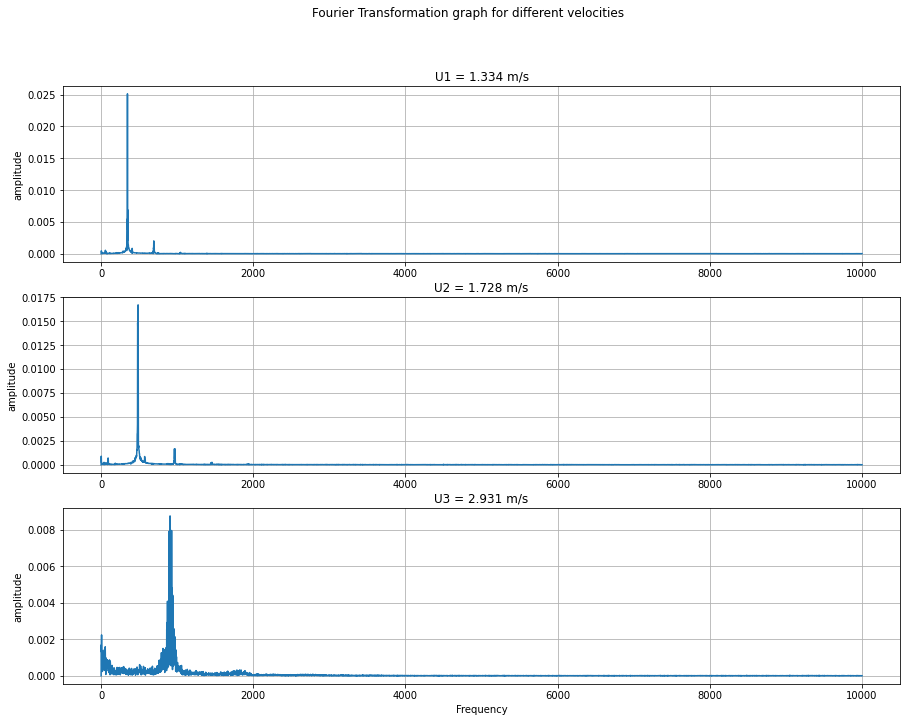

In [24]:
plt.figure(figsize=(15,11));
plt.suptitle('Fourier Transformation graph for different velocities');
plt.subplot(3,1,1);
plt.plot(freq,ampU1);plt.grid();plt.ylabel('amplitude');plt.title('U1 = 1.334 m/s');
plt.subplot(3,1,2);
plt.plot(freq,ampU2);plt.grid();plt.ylabel('amplitude');plt.title('U2 = 1.728 m/s');
plt.subplot(3,1,3);
plt.plot(freq,ampU3);plt.grid();plt.xlabel('Frequency');plt.ylabel('amplitude');plt.title('U3 = 2.931 m/s');

# Strouhal No. vs Reynolds No.

In [25]:
amp_133 = ampU1.max()
amp_17 = ampU2.max()
amp_2931 = ampU3.max()

In [26]:
fs = np.array([346.0692,486.0972,906.1812])
U = np.array([1.334,1.728,2.931])
nu = 1.48*pow(10,-5)
Re = U*d*pow(10,-3)/nu
St = fs*dv*pow(10,-3)/U

In [29]:
Re

array([ 540.81081081,  700.54054054, 1188.24324324])

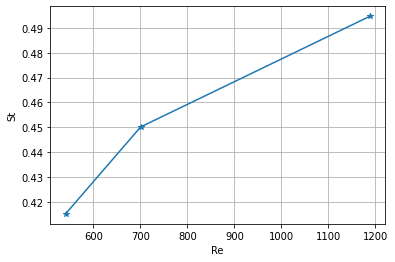

In [27]:
plt.plot(Re,St,"-*");plt.xlabel('Re');plt.ylabel("St");plt.grid();